# Data Description

Citation Request:
This dataset is public available for research. The details are described in [Cortez et al., 2009].
Please include this citation if you plan to use this database:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
[Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
[bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

Title: Wine Quality

Sources
Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009

Past Usage:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

In the above reference, two datasets were created, using red and white wine samples.
The inputs include objective tests (e.g. PH values) and the output is based on sensory data
(median of at least 3 evaluations made by wine experts). Each expert graded the wine quality
between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
these datasets under a regression approach. The support vector machine model achieved the
best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
analysis procedure).

Relevant Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables
are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks.
The classes are ordered and not balanced (e.g. there are munch more normal wines than
excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
or poor wines. Also, we are not sure if all input variables are relevant. So
it could be interesting to test feature selection methods.

Number of Instances: red wine - 1599; white wine - 4898.

Number of Attributes: 11 + output attribute

Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
feature selection.

Attribute information:

For more information, read [Cortez et al., 2009].

Input variables (based on physicochemical tests):
1 - fixed acidity (tartaric acid - g / dm^3)
2 - volatile acidity (acetic acid - g / dm^3)
3 - citric acid (g / dm^3)
4 - residual sugar (g / dm^3)
5 - chlorides (sodium chloride - g / dm^3
6 - free sulfur dioxide (mg / dm^3)
7 - total sulfur dioxide (mg / dm^3)
8 - density (g / cm^3)
9 - pH
10 - sulphates (potassium sulphate - g / dm3)
11 - alcohol (% by volume)
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

Missing Attribute Values: None

Description of attributes:

1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5 - chlorides: the amount of salt in the wine

6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11 - alcohol: the percent alcohol content of the wine

Output variable (based on sensory data):
12 - quality (score between 0 and 10)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Import datasets

**First step is to import the datasets into dataframe, after that merge them together. The last step will be to drop the 'Unnamed: 0' column, because it is an index column in the original file and it is not needed for me.**

In [2]:
dfw = pd.read_csv('wineQualityWhites.csv')

In [3]:
dfw.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
dfw['color'] = dfw['color'] = 'White'

In [5]:
dfw.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White


In [6]:
dfr=pd.read_csv('wineQualityReds.csv')

In [7]:
dfr.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
dfr['color'] = dfr['color'] = 'Red'

In [9]:
dfr.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


In [10]:
df = pd.concat([dfw, dfr],axis=0)

In [11]:
df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White


In [12]:
df.tail()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
1594,1595,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Red
1595,1596,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Red
1596,1597,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Red
1597,1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Red
1598,1599,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,Red


In [13]:
df = df.drop(['Unnamed: 0'],axis=1)

### Let's collect some information about the data set

**- Check the data types, to know what kind of types contains the dataframe**\
**- Describe the data, to get info about the min,max, distribution and so on**\
**- Check the null values(Nan), and duplicates** 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         6497 non-null   float64
 1   volatile.acidity      6497 non-null   float64
 2   citric.acid           6497 non-null   float64
 3   residual.sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free.sulfur.dioxide   6497 non-null   float64
 6   total.sulfur.dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [15]:
df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [16]:
df.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [17]:
df.shape

(6497, 13)

In [18]:
df2 = df
df2.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White


In [19]:
df2 = df2.drop_duplicates()

In [20]:
df2.shape

(5320, 13)

In [21]:
df = df2

In [22]:
df.shape

(5320, 13)

In [23]:
df.reset_index(drop=True, inplace=True)

**As you can see, there are some duplicates in the file. So lets drop them to get better prediction in the future steps !**

### Data distribution and correlation

array([[<AxesSubplot:title={'center':'fixed.acidity'}>,
        <AxesSubplot:title={'center':'volatile.acidity'}>,
        <AxesSubplot:title={'center':'citric.acid'}>],
       [<AxesSubplot:title={'center':'residual.sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free.sulfur.dioxide'}>],
       [<AxesSubplot:title={'center':'total.sulfur.dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

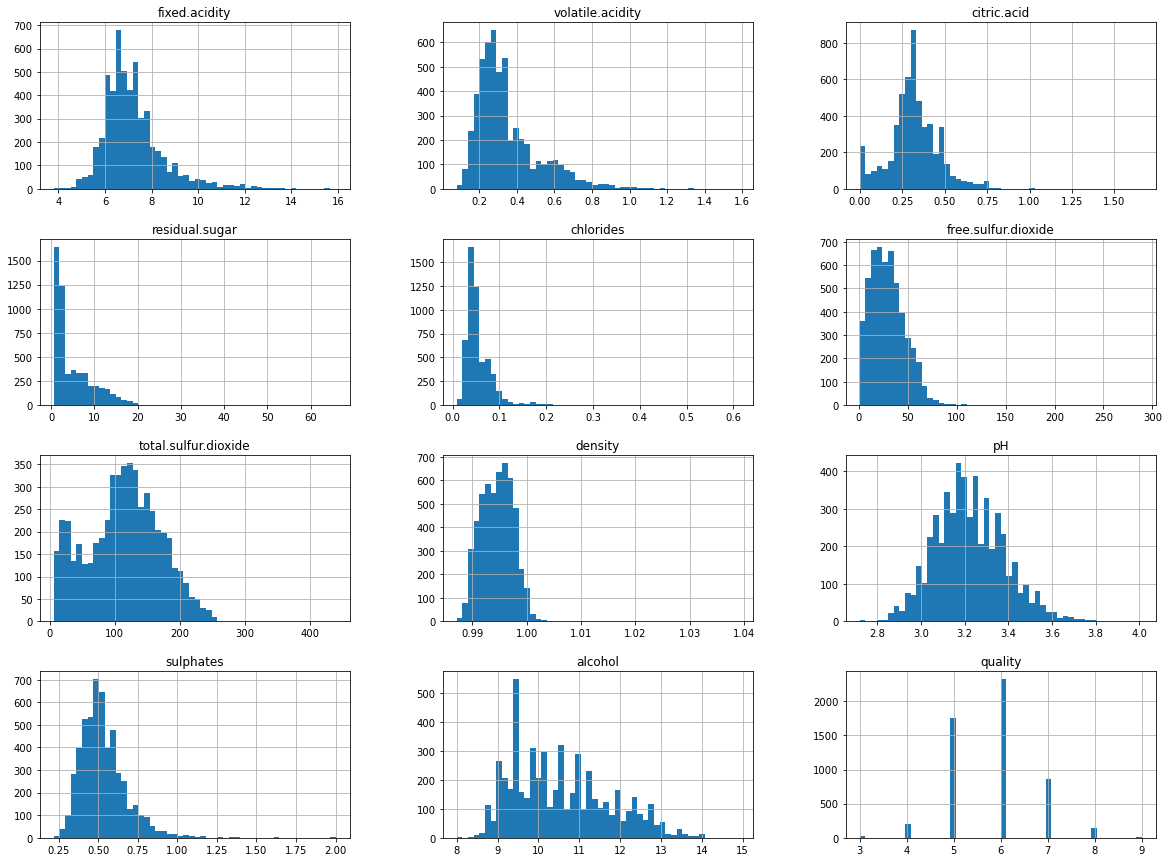

In [24]:
df.hist(bins=50, figsize=(20,15))

**More or less, we can see normal distribution parts, however some sections have skewness.**

In [25]:
df.corr()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573,-0.080092
volatile.acidity,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411,-0.265205
citric.acid,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496,0.097954
residual.sugar,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242,-0.056830
chlorides,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601,-0.202137
free.sulfur.dioxide,-0.281590,-0.349039,0.130849,0.398717,-0.186615,1.000000,0.720488,0.006166,-0.141747,-0.198244,-0.170012,0.054002
total.sulfur.dioxide,-0.327471,-0.400716,0.194835,0.487519,-0.269817,0.720488,1.000000,0.006711,-0.222956,-0.275836,-0.249004,-0.050296
density,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811,-0.326434
pH,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314,0.039733
sulphates,0.304844,0.227772,0.059183,-0.174717,0.405051,-0.198244,-0.275836,0.282690,0.168150,1.000000,-0.017232,0.041884


<AxesSubplot:>

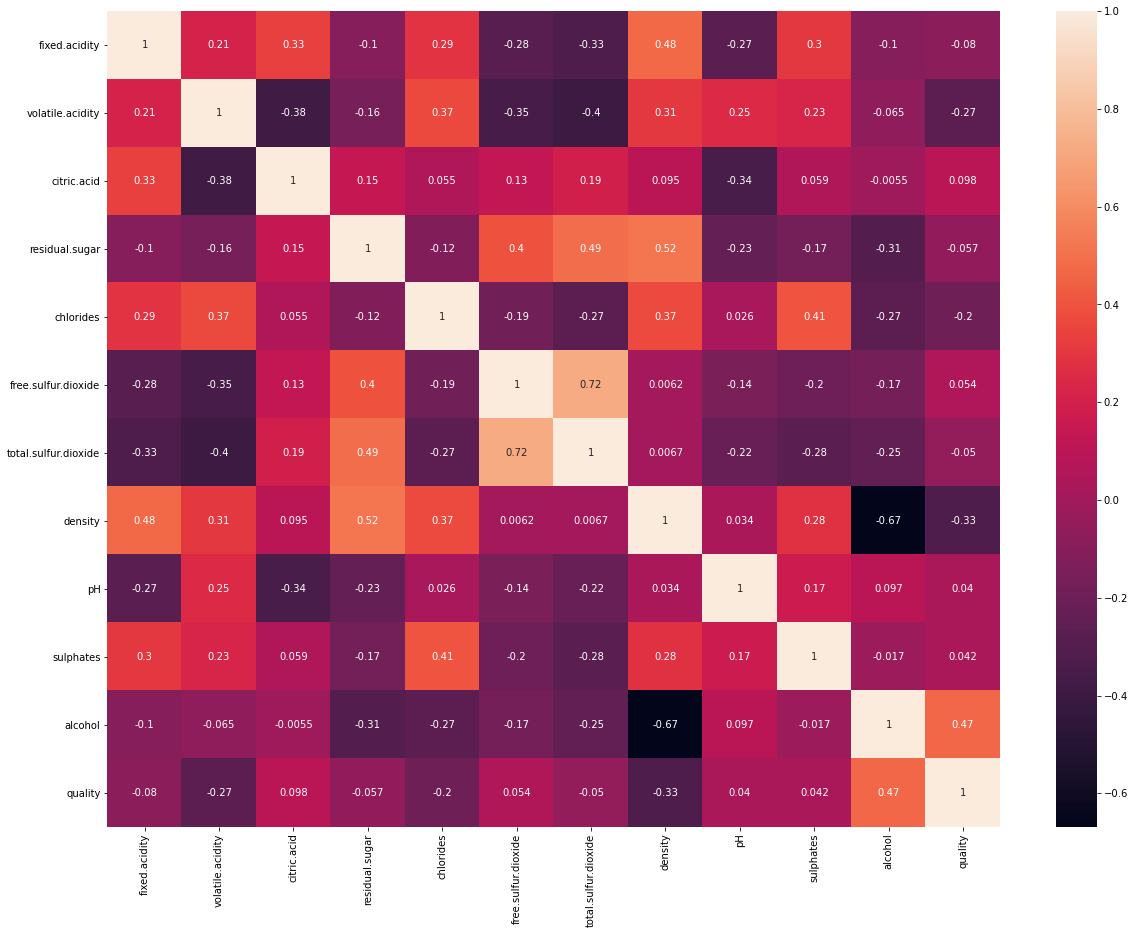

In [26]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

### Data preparation

**I would like to get some dummy variables from the target value (Red/White). After this step lets check the outliers**

In [27]:
# We can use the pd.get_dummies function also or one-hot encoding also

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.color=le.fit_transform(df.color)

list(le.classes_)

['Red', 'White']

In [29]:
df

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,0
5316,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
5317,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
5318,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


**0 is Red and 1 is White**

### Check the balance of target variable !

In [30]:
df['color'].value_counts()

1    3961
0    1359
Name: color, dtype: int64

**As we can see the balance is not the perfect one. Let's balance it**

In [31]:
df2 = df[df['color']==0]

In [32]:
df3 = df[df['color']==1].sample(n=1359)

In [33]:
df_new = pd.concat([df2,df3],axis = 0)

<AxesSubplot:xlabel='color', ylabel='count'>

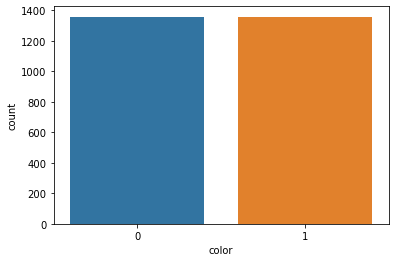

In [34]:
sns.countplot(data=df_new, x='color')

# Data scaling and Train, Test splitting

In [35]:
X=df_new.drop(['color'], axis = 1) 
y=df_new['color']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=3)

In [37]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test)

# Machine Learning 

**I would like to use some different machine learning algorithms in the following steps to predict the type of wine color. For this action I will use all features in the data set.**

### Logistic regression

In [38]:
from sklearn.linear_model import LogisticRegressionCV

In [39]:
logreg = LogisticRegressionCV(Cs=10, cv=4, solver='liblinear', penalty = 'l1', n_jobs = -1)

In [40]:
logreg.fit(X_train_s, y_train)

LogisticRegressionCV(cv=4, n_jobs=-1, penalty='l1', solver='liblinear')

In [41]:
pred_logreg = logreg.predict(X_test_s)

In [91]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy Score:')
accuracy_score(y_test, pred_logreg)

Accuracy Score:


0.9901960784313726

In [65]:
print('Confusion Matrix:')
confusion_matrix(y_test, pred_logreg)

Confusion Matrix:


array([[399,   7],
       [  1, 409]])

In [66]:
print('Classification Report:')
print(classification_report(y_test, pred_logreg))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       406
           1       0.98      1.00      0.99       410

    accuracy                           0.99       816
   macro avg       0.99      0.99      0.99       816
weighted avg       0.99      0.99      0.99       816



In [45]:
importance_logreg = logreg.coef_[0]
cols = df_new.columns[:-1]

In [67]:
df_imp_logreg = pd.Series(index = cols ,data =importance_logreg).to_frame()
df_imp_logreg = df_imp_logreg.rename(columns={0 :'Score'})
print('Importances:')
df_imp_logreg

Importances:


,Score
fixed.acidity,-2.702276
volatile.acidity,-10.060731
citric.acid,2.100762
residual.sugar,66.353367
chlorides,-15.693737
free.sulfur.dioxide,-7.077175
total.sulfur.dioxide,14.402314
density,-74.126498
pH,-2.133822
sulphates,-8.560526


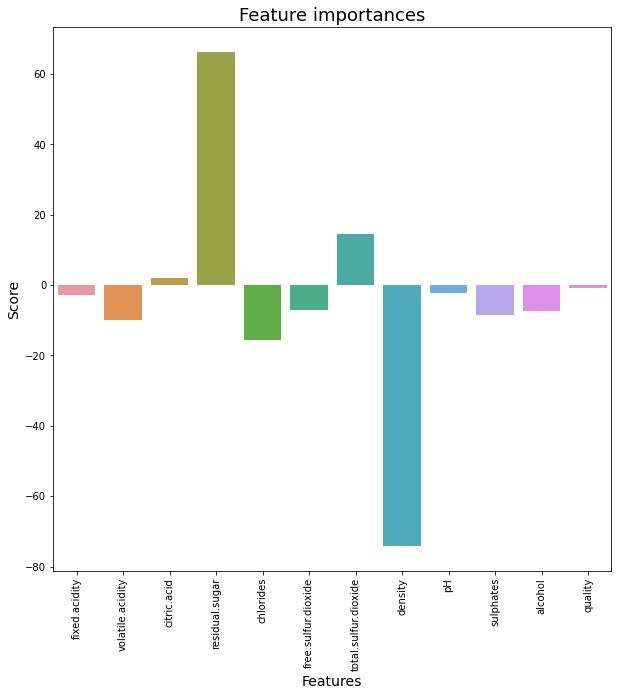

In [48]:
plt.figure(figsize=(10,10))
ax=sns.barplot(y=importance_logreg, x = cols)
plt.xticks(rotation=90)
ax.set_title('Feature importances', fontsize = 18)
ax.set_ylabel('Score', fontsize=14)
ax.set_xlabel('Features', fontsize=14)
plt.show()

### K Nearest Neighbors

**For the "K Nearest Neighbors" algorithm, I will use the GridSearchCV to find the best hyperparameters !**

In [151]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [152]:
knn = KNeighborsClassifier()

In [153]:
k_numbers = list(range(1, 51))
weights = ['uniform', 'distance']
metrics = ['euclidean','manhattan','minkowski']

In [154]:
parameters = dict(n_neighbors=k_numbers, weights=weights, metric=metrics)

In [155]:
grid_knn = GridSearchCV(estimator=knn, param_grid=parameters, cv=10, scoring='accuracy')

In [156]:
grid_knn.fit(X_train_s, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [157]:
print('Best Score: ',grid_knn.best_score_)
print('Best Parameters: \n',grid_knn.best_params_)

Best Score:  0.986855883163406
Best Parameters: 
 {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


**Let's predeict !**

In [158]:
pred_knn=grid_knn.predict(X_test_s)

In [159]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy Score:')
accuracy_score(y_test, pred_knn)

Accuracy Score:


0.9828431372549019

In [160]:
print('Confusion Matrix:')
confusion_matrix(y_test, pred_knn)

Confusion Matrix:


array([[399,   7],
       [  7, 403]])

In [161]:
print('Classification Report:')
print(classification_report(y_test, pred_knn))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       406
           1       0.98      0.98      0.98       410

    accuracy                           0.98       816
   macro avg       0.98      0.98      0.98       816
weighted avg       0.98      0.98      0.98       816



**The KNN does not contain the 'feature_importance_' Function !!!**

### Random Forest

**For the "Random Forest" algorithm, I will use the GridSearchCV to find the best hyperparameters !**

In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [127]:
forest = RandomForestClassifier()

In [137]:
n_estimators = [100,300,500]
max_depth = [2,5,10,20]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,5,10] 

In [138]:
parameters = dict(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

In [139]:
grid = GridSearchCV(estimator=forest, param_grid=parameters, cv=5, scoring='accuracy')

In [140]:
grid.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [141]:
print('Best Score: ',grid.best_score_)
print('Best Parameters: \n',grid.best_params_)

Best Score:  0.991588617212322
Best Parameters: 
 {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}


In [142]:
pred_rf=grid.predict(X_test_s)

In [143]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy Score:')
accuracy_score(y_test, pred_rf)

Accuracy Score:


0.9828431372549019

In [144]:
print('Confusion Matrix:')
confusion_matrix(y_test, pred_rf)

Confusion Matrix:


array([[395,  11],
       [  3, 407]])

In [145]:
print('Classification Report:')
print(classification_report(y_test, pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       406
           1       0.97      0.99      0.98       410

    accuracy                           0.98       816
   macro avg       0.98      0.98      0.98       816
weighted avg       0.98      0.98      0.98       816



In [148]:
importance_rf = grid.best_estimator_.feature_importances_
cols = df_new.columns[:-1]

In [149]:
df_imp_rf = pd.Series(index = cols ,data =importance_rf).to_frame()
df_imp_rf = df_imp_rf.rename(columns={0 :'Score'})
print('Importances:')
df_imp_rf

Importances:


,Score
fixed.acidity,0.029925
volatile.acidity,0.126427
citric.acid,0.015173
residual.sugar,0.069583
chlorides,0.297582
free.sulfur.dioxide,0.040920
total.sulfur.dioxide,0.238818
density,0.085300
pH,0.015254
sulphates,0.070132


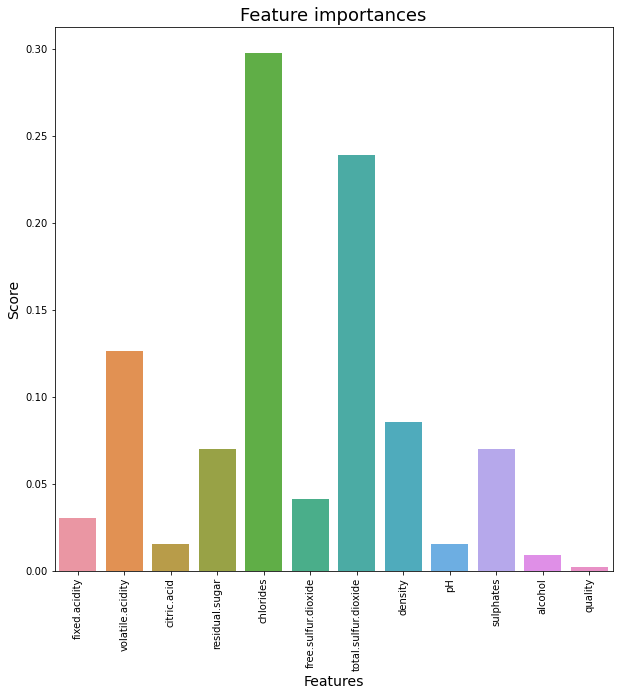

In [150]:
plt.figure(figsize=(10,10))
ax=sns.barplot(y=importance_rf, x = cols)
plt.xticks(rotation=90)
ax.set_title('Feature importances', fontsize = 18)
ax.set_ylabel('Score', fontsize=14)
ax.set_xlabel('Features', fontsize=14)
plt.show()

# Summary

In [163]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [166]:
acc_lr = accuracy_score(y_test, pred_logreg)
f1_lr = f1_score(y_test, pred_logreg)
prec_lr = precision_score(y_test, pred_logreg)
rec_lr = recall_score(y_test, pred_logreg)

acc_knn = accuracy_score(y_test, pred_knn)
f1_knn = f1_score(y_test, pred_knn)
prec_knn = precision_score(y_test, pred_knn)
rec_knn = recall_score(y_test, pred_knn)

acc_rf = accuracy_score(y_test, pred_rf)
f1_rf = f1_score(y_test, pred_rf)
prec_rf = precision_score(y_test, pred_rf)
rec_rf = recall_score(y_test, pred_rf)

In [167]:
acc = [acc_lr, acc_knn, acc_rf]
f1 = [f1_lr, f1_knn, f1_rf]
prec = [prec_lr, prec_knn, prec_rf]
rec = [rec_lr, rec_knn, rec_rf]
labels = ['Logistic Regrassion','K Nearest Neighbor', 'Random Forest']

In [182]:
score_df1 = pd.Series(acc, index=labels).to_frame()
score_df1.rename(columns={0: 'Accuracy Score'}, inplace=1)
data = {'F1 Score' : f1, 'Precission Score': prec, 'Recall Score': rec}
score_df2 = pd.DataFrame(data = data,index = labels)
score_df = pd.concat([score_df1, score_df2],axis=1)

In [184]:
score_df

,Accuracy Score,F1 Score,Precission Score,Recall Score
Logistic Regrassion,0.990196,0.990315,0.983173,0.997561
K Nearest Neighbor,0.982843,0.982927,0.982927,0.982927
Random Forest,0.982843,0.983092,0.973684,0.992683


# Conclusion

**Data Preparation: In the frist steps I hava concatenated the two data sets(White and Red). After this movement I have droped the duplicates and checked the null values. With help of some plots I have checked the Distribution and Correlation between the data. The next step has been the balance between the target variables to creat a correct prediction. Furthermore I have scaled and splitted the data set for the machine learning models.**

**Create Models: I have used 3 differnet models to find the best one for prediction based on the scores. Logistic Regression, KNN, Random Forest.**

**Final Conclusion: Based on the figures I can recommend the Logistic Regression model.**

**For the Future: There are some possibilities to fine tune the hyperparameters. Or create some new models like Decision tree, Support Vector Machine (SVM), XGboost or more complex Deep learning models.**